In [3]:
# OPTIONAL: Load the "autoreload" eX_orig[alias]tension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

%matplotlib inline

In [4]:
import umap
import seaborn as sns
from scipy import stats
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from skbio.stats.composition import clr
from sklearn.covariance import MinCovDet
from statannotations.Annotator import Annotator
from adjustText import adjust_text
from PIL import Image as PILImage

from src.config import get_experiment_artifacts, SAMPLE, PAIRED_SAMPLES
from src.util import calculate_difference_to_controls
from src.models.outliers import logratio_outlier_detection


# Show images inline
from IPython.display import Image

# Standard library packages
import io
import os

# Import Biopython modules to interact with KEGG
from Bio import SeqIO
from Bio.KEGG import REST
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas

In [5]:
Z_paired = pkl.load(open("{}/imputed_adamson_sample_data.pkl".format(get_experiment_artifacts(profile_type=PAIRED_SAMPLES)), "rb"))
d_paired = pd.concat(Z_paired, axis=1)

Z_paired.update(pkl.load(open("{}/imputed_sample_data.pkl".format(get_experiment_artifacts(profile_type=PAIRED_SAMPLES)), "rb")))
d_paired = pd.concat(Z_paired, axis=1).dropna()
print(d_paired.shape)

(322, 28)


In [6]:
Z_all = pd.concat(Z_paired)
gene_counts = Z_all.index.get_level_values(1).value_counts() 
common_genes = gene_counts[gene_counts == gene_counts.max()].index

In [7]:
results = {}
for alias in Z_paired.keys():
    pca_scores, loadings, explained_variance_ratio, distances, pvalues = logratio_outlier_detection(Z_paired[alias].loc[common_genes, :], MinCovDet(random_state=0))
    results[alias] = pca_scores, loadings, explained_variance_ratio, distances, pvalues
    results[alias] = pd.Series(distances, index=common_genes).sort_values(ascending=False)

In [8]:
Xpseudodifftop500 = {}
Xpseudodiff = {}
idx = pd.IndexSlice

for alias in Z_paired.keys():
    pseudo_controls = results[alias].iloc[-30:].index.to_series()
    top500 = results[alias].sort_values(ascending=False)[:100].index
    data = calculate_difference_to_controls(Z_all.loc[idx[alias, common_genes], :], pseudo_controls, [alias], return_log2_fold_change=False)
    Xpseudodifftop500[alias] = data.loc[top500]
    Xpseudodiff[alias] = data
    
Xpseudodifftop500 = pd.concat(Xpseudodifftop500.values(), axis=1)
Xpseudodifftop500

Xpseudodiff = pd.concat(Xpseudodiff.values(), axis=1)
Xpseudodiff

(322, 7)
(30, 7)
(322, 7)
(7,)
(322, 7)
(322, 7)
(30, 7)
(322, 7)
(7,)
(322, 7)
(322, 7)
(30, 7)
(322, 7)
(7,)
(322, 7)
(322, 7)
(30, 7)
(322, 7)
(7,)
(322, 7)


Sample                        Adamson_T1                             \
lumc_category Deletion 0bp microhomology Deletion 1bp microhomology   
Gene                                                                  
Actr5                          -0.004460                   0.004460   
Actr8                           0.003978                   0.008297   
Aicda                          -0.003315                   0.001098   
Alkbh2                         -0.001583                  -0.002057   
Alyref                          0.001950                   0.018689   
...                                  ...                        ...   
Xrcc4                          -0.001786                   0.008666   
Xrcc6                          -0.014631                  -0.067299   
Ybx3                            0.005170                   0.010346   
Yy1                             0.000526                   0.006036   
Zranb3                         -0.004147                   0.004789   

Sample                                                            \
lumc_category Deletion 2bp microhomology Deletion with insertion   
Gene                                                               
Actr5                          -0.013515                0.001575   
Actr8                          -0.005322               -0.004006   
Aicda                           0.002111                0.002349   
Alkbh2                          0.001250               -0.000285   
Alyref                         -0.004723               -0.003902   
...                                  ...                     ...   
Xrcc4                           0.002261               -0.002004   
Xrcc6                          -0.009374                0.018219   
Ybx3                           -0.000220               -0.011261   
Yy1                             0.001200               -0.000448   
Zranb3                         -0.000952               -0.001448   

Sample                                                \
lumc_category Homology Directed Repair Any Insertion   
Gene                                                   
Actr5                        -0.002380      0.018326   
Actr8                         0.000729      0.003102   
Aicda                        -0.000298     -0.001503   
Alkbh2                        0.002671     -0.001177   
Alyref                       -0.003720     -0.002285   
...                                ...           ...   
Xrcc4                         0.000241     -0.006337   
Xrcc6                         0.009132      0.056588   
Ybx3                         -0.005798     -0.001119   
Yy1                          -0.000699     -0.006363   
Zranb3                        0.001103      0.001144   

Sample                                                            T1  \
lumc_category Deletion 3+bp microhomology Deletion 0bp microhomology   
Gene                                                                   
Actr5                           -0.004006                  -0.001000   
Actr8                           -0.006779                   0.000584   
Aicda                           -0.000442                   0.000699   
Alkbh2                           0.001181                   0.002107   
Alyref                          -0.006009                  -0.002691   
...                                   ...                        ...   
Xrcc4                           -0.001041                  -0.018463   
Xrcc6                            0.007365                  -0.001627   
Ybx3                             0.002882                   0.019403   
Yy1                             -0.000251                   0.015978   
Zranb3                          -0.000488                  -0.007686   

Sample                                                               ...  \
lumc_category Deletion 1bp microhomology Deletion 2bp microhomology  ...   
Gene                                                                 ...   
Actr5                         

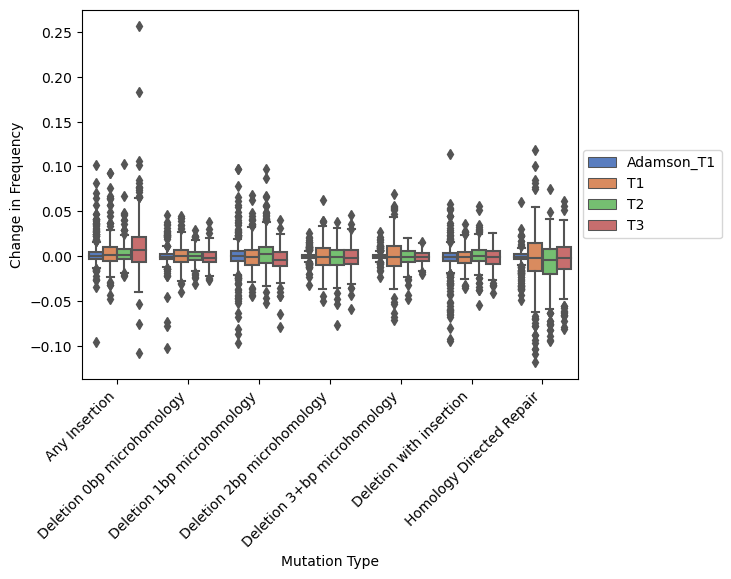

In [9]:
boxplot_df = Xpseudodiff.stack().stack().reset_index().rename(columns={0: "Change in Frequency", "lumc_category": "Mutation Type", "Sample": "Target"})

sns.boxplot(data=boxplot_df, y="Change in Frequency", x="Mutation Type", orient="v", hue="Target", palette="muted")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
plt.show()

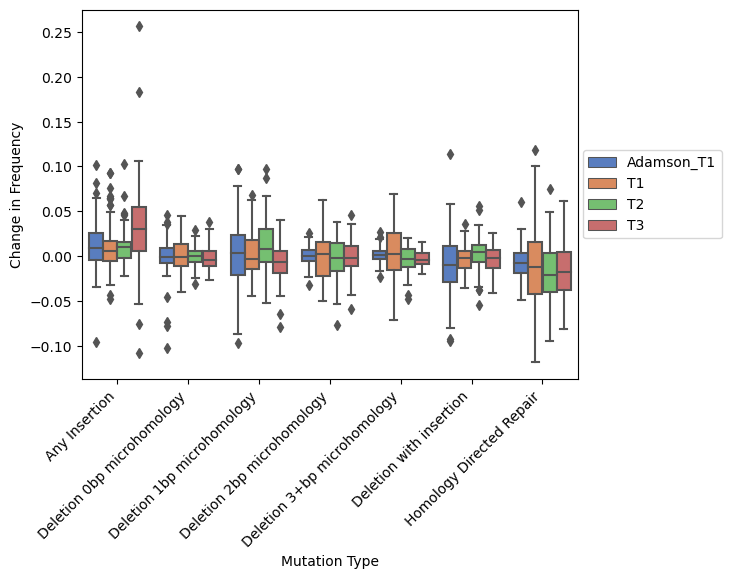

In [10]:
boxplot_df = Xpseudodifftop500.stack().stack().reset_index().rename(columns={0: "Change in Frequency", "lumc_category": "Mutation Type", "Sample": "Target"})

sns.boxplot(data=boxplot_df, y="Change in Frequency", x="Mutation Type", orient="v", hue="Target", palette="muted")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
plt.show()

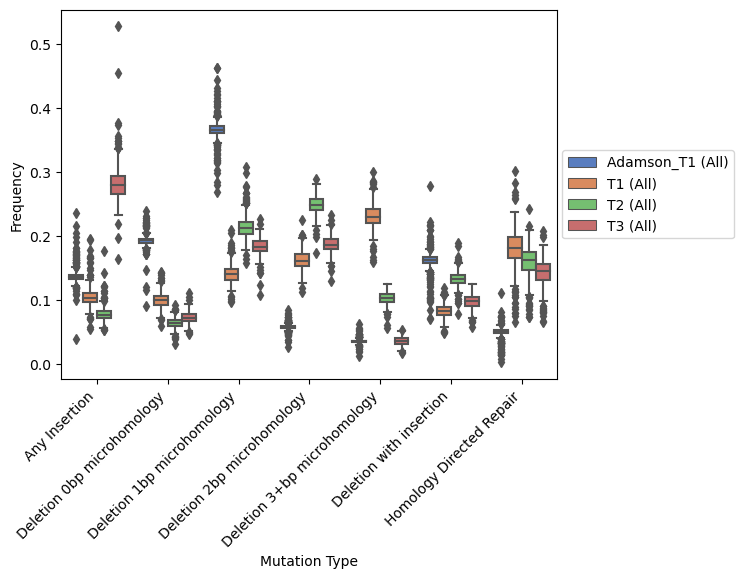

In [22]:
boxplot_df1 = {}

for alias in Z_paired.keys():
    data = Z_paired[alias].loc[common_genes]
    boxplot_df1[alias] = data

boxplot_df1 = pd.concat(boxplot_df1, axis=0)
boxplot_df1 = boxplot_df1[sorted(boxplot_df1.columns)]
boxplot_df1 = boxplot_df1.stack().reset_index().rename(columns={0: "Frequency", "lumc_category": "Mutation Type", "level_0": "Target"})
boxplot_df1["Target"] += " (All)"

sns.boxplot(data=boxplot_df1, y="Frequency", x="Mutation Type", orient="v", hue="Target", palette="muted")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
plt.show()

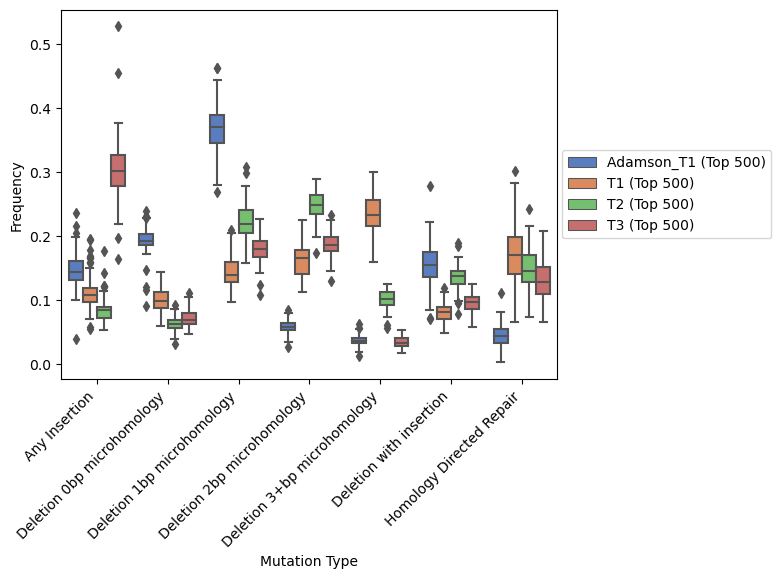

In [23]:
boxplot_df2 = {}

for alias in Z_paired.keys():
    top500 = results[alias].sort_values(ascending=False)[:100].index
    data = Z_paired[alias].loc[top500].copy()
    boxplot_df2[alias] = data

boxplot_df2 = pd.concat(boxplot_df2, axis=0)
boxplot_df2 = boxplot_df2[sorted(boxplot_df2.columns)]
boxplot_df2 = boxplot_df2.stack().reset_index().rename(columns={0: "Frequency", "lumc_category": "Mutation Type", "level_0": "Target"})
boxplot_df2["Target"] += " (Top 500)"

sns.boxplot(data=boxplot_df2, y="Frequency", x="Mutation Type", orient="v", hue="Target", palette="muted")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
plt.show()


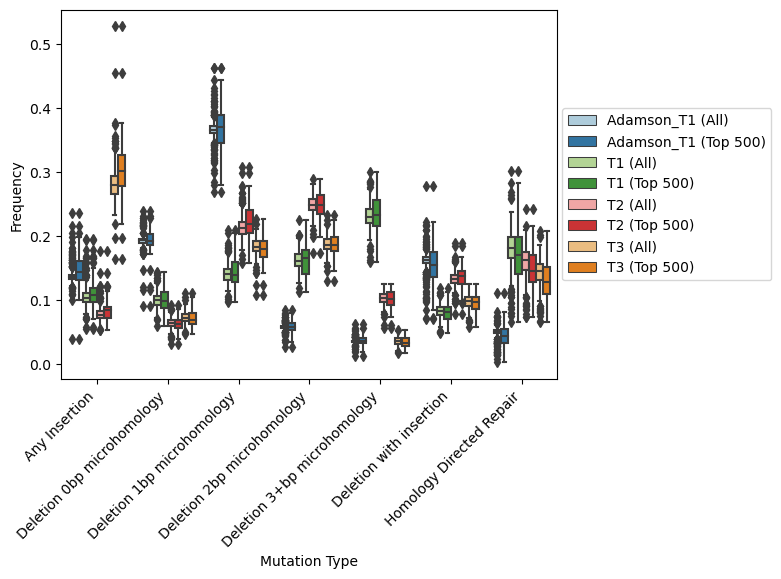

In [30]:
boxplot_df3 = pd.concat([boxplot_df1, boxplot_df2]).sort_values(by=["Target", "Mutation Type"])


sns.boxplot(data=boxplot_df3, y="Frequency", x="Mutation Type", orient="v", hue="Target", palette="Paired")
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0)
plt.show()